In [1]:
import torch
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

In [10]:
# output = torch.load('./bin/pred_masks/kidney_2_pred.pt')
true_mask = torch.load('/root/data/cache/train/kidney_2/labels.pt')



In [11]:
copy_over = (true_mask[:,0:900]).clone()
true_mask[:,1:901] = copy_over

In [6]:
pmask = output > 0.5
del output

In [12]:
bin_size = 100

fn_list = []
fp_list = []

for i in range(pmask.shape[1] // bin_size + 1):
    pred = pmask[:,i*bin_size:(i+1)*bin_size]
    true = true_mask[:,i*bin_size:(i+1)*bin_size]

    fn_list.append(torch.sum(true * (~pred)))
    fp_list.append(torch.sum((~true) * pred))

# plt.bar(x_FN, FN_sums, color='r', edgecolor='black')

#     torch.cat([ #collect TP, FP, FN
#     true * pmask, # true positive
#     (~true) * pmask, # false positive
#     true * (~pmask) # false negative
# ], dim=0)
fn_list = [x.item() for x in fn_list]
fp_list = [x.item() for x in fp_list]

In [5]:
max(fn_list), max(fp_list)

(1863453, 77479)

In [13]:
fn_modded = fn_list.copy()
fp_modded = fp_list.copy()
fn_modded[12] = 0

<BarContainer object of 23 artists>

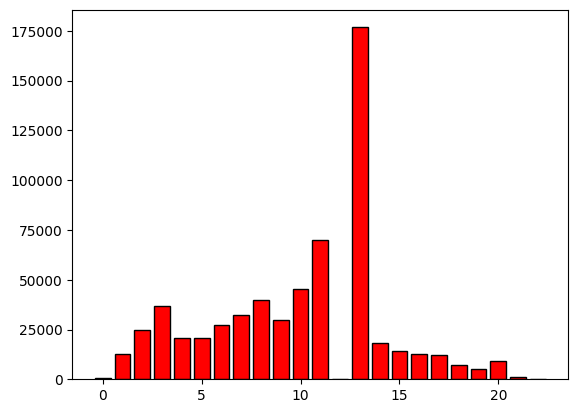

In [16]:
plt.bar(range(len(fn_list)), fn_modded, color='r', edgecolor='black')


<BarContainer object of 23 artists>

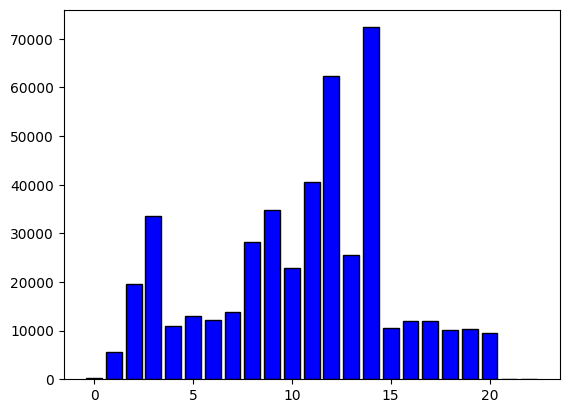

In [17]:
plt.bar(range(len(fp_list)), fp_list, color='b', edgecolor='black')

In [ ]:
plt.bar(range(23), fn_list, color='r', edgecolor='black')


In [19]:
len(fn_list)

23

In [3]:
path = "/root/data/train/kidney_2/images/" # the path to the directory that contains the tiff files
file_list = os.listdir(path) # get the list of file names in the directory
lbls = "/root/data/train/kidney_2/labels/"
lbl_list = os.listdir(lbls)
# output = np.load('/root/sennet-kaggle/src/util/2d_nn/2d_segmentation.npy') # load the output file

thr = 25

inter_new_list = [] # a list to store the inter_new values for each file and label
FP_list = [] # a list to store the FP values for each file and label
FN_list = [] # a list to store the FN values for each file and label
dice_list = []

for i in range(len(file_list)): 
    img = tiff.imread(path + file_list[i]) 
    lbl = tiff.imread(lbls + lbl_list[i]) 
    gen = output[i,:,:] # works

    #gen = gen.astype(np.float32) 
    #gen = tc.from_numpy(gen)
    lbl = tc.from_numpy(lbl)
    gen = tc.from_numpy(gen)
    gen_thr = (gen > thr).int()
    lbl_thr = (lbl > thr).int()
    inter_n = (lbl_thr*gen_thr).sum(dim=(-1,-2))
    den_n = lbl_thr.sum(dim=(-1,-2)) + gen_thr.sum(dim=(-1,-2))
    dice_n = ((2*inter_n+0.001)/(den_n+0.001)).mean()

    test = gen_thr - lbl_thr
    FP = np.count_nonzero(test > 0)
    FP_list.append(FP) # append the FP value to the list

    test_FN = lbl_thr - gen_thr
    FN = np.count_nonzero(test_FN > 0)
    FN_list.append(FN) # append the FN value to the list

    inter_new = (np.count_nonzero(gen_thr) - (FN + FP))
    inter_new_list.append(inter_new) # append the inter_new value to the list'''

    dice_list.append(dice_n)


print(inter_new_list) # print the list of inter_new values
print(FP_list) # print the list of FP values
print(FN_list) # print the list of FN values

: 

In [2]:
import os
from glob import glob
data_dir = "/root/data/test"
scan_folders = glob(data_dir + "/*/")

In [3]:
scan_folders

['/root/data/test/kidney_5/', '/root/data/test/kidney_6/']

In [6]:
slices = glob(scan_folders[0] + "images/*.tif")

In [13]:
def id_from_pth(pth: str):
    parts = pth.split("/")[-3:]
    parts.pop(1)
    return "_".join(parts)[:-4]

In [15]:
id_from_pth(slices[1])

'kidney_5_0001'

In [ ]:
def get_mark(self,index):
    id=self.img_paths[index].split("/")[-3:]
    id.pop(1)
    id="_".join(id)
    return id[:-4]

In [44]:
glob(scan_folders[0] + "images/*.tif")

['/root/data/test/kidney_5/images/0000.tif',
 '/root/data/test/kidney_5/images/0001.tif',
 '/root/data/test/kidney_5/images/0002.tif']

In [23]:
fns

['0000.tif',
 '0001.tif',
 '0002.tif',
 '0003.tif',
 '0004.tif',
 '0005.tif',
 '0006.tif',
 '0007.tif',
 '0008.tif',
 '0009.tif',
 '0010.tif',
 '0011.tif',
 '0012.tif',
 '0013.tif',
 '0014.tif',
 '0015.tif',
 '0016.tif',
 '0017.tif',
 '0018.tif',
 '0019.tif',
 '0020.tif',
 '0021.tif',
 '0022.tif',
 '0023.tif',
 '0024.tif',
 '0025.tif',
 '0026.tif',
 '0027.tif',
 '0028.tif',
 '0029.tif',
 '0030.tif',
 '0031.tif',
 '0032.tif',
 '0033.tif',
 '0034.tif',
 '0035.tif',
 '0036.tif',
 '0037.tif',
 '0038.tif',
 '0039.tif',
 '0040.tif',
 '0041.tif',
 '0042.tif',
 '0043.tif',
 '0044.tif',
 '0045.tif',
 '0046.tif',
 '0047.tif',
 '0048.tif',
 '0049.tif',
 '0050.tif',
 '0051.tif',
 '0052.tif',
 '0053.tif',
 '0054.tif',
 '0055.tif',
 '0056.tif',
 '0057.tif',
 '0058.tif',
 '0059.tif',
 '0060.tif',
 '0061.tif',
 '0062.tif',
 '0063.tif',
 '0064.tif',
 '0065.tif',
 '0066.tif',
 '0067.tif',
 '0068.tif',
 '0069.tif',
 '0070.tif',
 '0071.tif',
 '0072.tif',
 '0073.tif',
 '0074.tif',
 '0075.tif',
 '0076.tif',

In [1]:
import pandas as pd

df = pd.read_csv('/root/data/train_rles.csv')

/tmp/ipykernel_76129/1315219934.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
n = 10
pos =40
df[df['id'].str.contains("kidney_1_dense")][pos:pos+n]


,id,rle
40,kidney_1_dense_0040,1 0
41,kidney_1_dense_0041,1 0
42,kidney_1_dense_0042,1 0
43,kidney_1_dense_0043,1 0
44,kidney_1_dense_0044,1 0
45,kidney_1_dense_0045,1 0
46,kidney_1_dense_0046,1 0
47,kidney_1_dense_0047,1 0
48,kidney_1_dense_0048,1 0
49,kidney_1_dense_0049,1 0


In [8]:
import numpy as np

pixels = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8) > 100
pixels = pixels.flatten()
pixels = np.concatenate([[0], pixels, [0]])
pixels

array([0, 1, 1, ..., 0, 1, 0])

In [10]:
pixels[:20]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [17]:
np.where(pixels[1:] != pixels[:-1])

(array([    0,     3,     4, ..., 29997, 29999, 30000]),)

In [24]:
runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
print(runs[:10])
# runs[1::2] -= runs[::2]
# print(runs[:10])

[ 1  4  5  8  9 14 15 18 23 28]


In [27]:
print(runs[1::2][:10])
print(runs[::2][:10])

[ 4  8 14 18 28 31 38 40 43 46]
[ 1  5  9 15 23 29 33 39 41 45]
